In [644]:
import pandas as pd
import numpy as np

In [645]:
df = pd.read_csv('train.csv')

In [646]:
import math
def deg_to_rad(dr):
    return (dr*math.pi)/180

df['pick_lat'] = deg_to_rad(df['pick_lat'])
df['pick_lon'] = deg_to_rad(df['pick_lon'])
df['drop_lat'] = deg_to_rad(df['drop_lat'])
df['drop_lon'] = deg_to_rad(df['drop_lon'])

In [647]:
dlon = df['drop_lon'] - df['pick_lon']
dlat = df['drop_lat'] - df['pick_lat']

In [648]:
df['dist'] = np.sin(dlat/2)**2 + np.cos(df['pick_lat'])*np.cos(df['drop_lat'])*np.sin(dlon/2)**2

In [649]:
df['dist'] = 2*np.arctan2(df['dist']**0.5,(1-df['dist'])**0.5)

In [650]:
R = 6373.0
df['dist'] = R*df['dist']

In [651]:
X = df
for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        
        print ("Feature '{col_name}' has {unique_cat} unique categories".format
              (col_name = col_name, unique_cat = unique_cat)
              )

Feature 'pickup_time' has 15613 unique categories
Feature 'drop_time' has 15665 unique categories
Feature 'label' has 2 unique categories


In [652]:
df['label']

0        correct
1        correct
2        correct
3        correct
4        correct
          ...   
17171    correct
17172    correct
17173    correct
17174    correct
17175    correct
Name: label, Length: 17176, dtype: object

In [653]:
print (X['label'].value_counts().sort_values(ascending = False).head(10))

correct      15495
incorrect     1681
Name: label, dtype: int64


In [654]:
X.isnull().sum().sort_values(ascending=False).head()

meter_waiting_till_pickup    202
meter_waiting_fare           202
meter_waiting                202
duration                     202
additional_fare              202
dtype: int64

In [655]:
#!pip install matplotlib

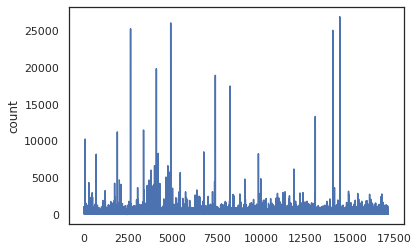

In [656]:
import matplotlib.pyplot as plt
plt.plot(df['fare'])
plt.ylabel('count')
plt.show()

In [657]:
df['fare'].count()
df['label'] = df['label'].map({'correct': 1, 'incorrect': 0})

In [658]:
df

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,dist
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,0.119774,1.394506,0.120485,1.394139,270.32,1,5.094369
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,0.120181,1.394490,0.120667,1.394384,197.85,1,3.169052
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,0.120574,1.393909,0.121068,1.394773,301.64,1,6.307375
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,0.120876,1.394335,0.120907,1.394467,82.30,1,0.862217
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,0.119981,1.393846,0.119464,1.395024,358.39,1,8.150340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,213803193,10.5,838.0,93.0,5.4219,451.0,1/31/2020 22:07,1/31/2020 22:21,0.127247,1.407376,0.127215,1.407708,198.26,1,2.106037
17172,213812756,10.5,2151.0,428.0,0.0000,39.0,1/31/2020 23:07,1/31/2020 23:43,0.120527,1.393673,0.121316,1.395197,581.23,1,10.871789
17173,213813930,10.5,263.0,9.0,0.0000,110.0,1/31/2020 23:21,1/31/2020 23:25,0.123780,1.394518,0.123942,1.394548,76.20,1,1.045847
17174,213815405,10.5,858.0,115.0,0.0000,317.0,1/31/2020 23:39,1/31/2020 23:53,0.121220,1.394113,0.121051,1.394536,133.31,1,2.879981


In [659]:
df = df.drop(['pickup_time','drop_time','pick_lat','pick_lon','drop_lat','drop_lon'], axis = 1) 

In [660]:
#drop na
df = df.dropna(how='any')           # assign back
df.dropna(how='any', inplace=True)

In [661]:
y = df['label']
df = df.drop(['label'], axis = 1)

In [662]:
df.isnull().sum().sort_values(ascending=False).head()

dist                         0
fare                         0
meter_waiting_till_pickup    0
meter_waiting_fare           0
meter_waiting                0
dtype: int64

In [663]:
#!pip install xgboost

In [664]:
X = df

In [665]:
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [666]:
X_train

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,dist
7800,200213054,10.5,3887.0,2276.0,131.596607,0.0,497.22,1.535472
7505,199766768,10.5,1604.0,326.0,18.842800,5.0,357.58,7.112965
16150,212370397,10.5,3681.0,673.0,38.930322,154.0,643.17,10.693558
9647,203080305,10.5,1499.0,110.0,6.413000,66.0,247.72,3.415113
792,190050969,5.0,453.0,11.0,0.641300,0.0,116.60,1.782892
...,...,...,...,...,...,...,...,...
2207,191538535,40.5,1978.0,550.0,29.478000,27.0,356.58,6.285043
4261,194725503,10.5,1871.0,277.0,16.149100,287.0,345.79,0.044761
1168,190376080,10.5,490.0,0.0,0.000000,145.0,60.50,0.033145
2334,191651860,10.5,310.0,88.0,5.130400,18.0,147.17,1.660265


In [667]:
X_test

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,dist
686,189978643,10.5,3349.0,1390.0,75.94920,501.0,486.01,7.847941
3267,193312653,10.5,2043.0,520.0,30.05600,5.0,271.80,5.510215
8103,200737601,10.5,870.0,130.0,0.00000,189.0,149.91,2.381766
16964,213394977,10.5,995.0,21.0,0.00000,111.0,217.56,4.885200
9610,203051356,10.5,1726.0,331.0,0.00000,54.0,329.26,7.686121
...,...,...,...,...,...,...,...,...
6277,197983314,10.5,1793.0,573.0,0.00000,144.0,244.23,5.203530
8035,200662019,10.5,3501.0,467.0,0.00000,129.0,755.87,15.817361
8001,200624568,10.5,803.0,82.0,0.00000,41.0,206.17,3.717508
16788,213172345,10.5,1722.0,331.0,19.18436,91.0,345.86,6.962228


In [668]:
import xgboost as xgb

D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

In [669]:
param = {
    'eta': 0.3, 
    'max_depth': 100,  
    'objective': 'multi:softprob',  
    'num_class': 2} 

steps = 30  # The number of training iterations

In [670]:
model = xgb.train(param, D_train, steps)

In [671]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))
print("F1 score = {}".format(f1_score(y_test, best_preds)))

Precision = 0.8808806690136556
Recall = 0.7778783771773907
Accuracy = 0.9510901591043017
F1 score = 0.97361729179911


In [672]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=30)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [673]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 score = {}".format(f1_score(y_test, y_pred)))

Accuracy: 0.9493223335297584
F1 score = 0.9727589483687045


In [674]:
import seaborn as sns
import matplotlib.pyplot as plt

In [675]:
sns.set(style="white", color_codes=True)

In [676]:
"""
sns.FacetGrid(df, hue="label", size=5) \
   .map(plt.scatter, "tripid", "fare") \
   .add_legend()
"""

'\nsns.FacetGrid(df, hue="label", size=5)    .map(plt.scatter, "tripid", "fare")    .add_legend()\n'

In [677]:
df_test = pd.read_csv('test.csv')

In [678]:
df_test['pick_lat'] = deg_to_rad(df_test['pick_lat'])
df_test['pick_lon'] = deg_to_rad(df_test['pick_lon'])
df_test['drop_lat'] = deg_to_rad(df_test['drop_lat'])
df_test['drop_lon'] = deg_to_rad(df_test['drop_lon'])

In [679]:
dlon = df_test['drop_lon'] - df_test['pick_lon']
dlat = df_test['drop_lat'] - df_test['pick_lat']

In [680]:
df_test['dist'] = np.sin(dlat/2)**2 + np.cos(df_test['pick_lat'])*np.cos(df_test['drop_lat'])*np.sin(dlon/2)**2

In [681]:
df_test['dist'] = 2*np.arctan2(df_test['dist']**0.5,(1-df_test['dist'])**0.5)

In [682]:
R = 6373.0
df_test['dist'] = R*df_test['dist']

In [683]:
df_test

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,dist
0,213284604,10.5,924,42,2.44860,148,2/1/2020 0:38,2/1/2020 0:53,0.119285,1.394082,0.118244,1.394239,289.27,6.707807
1,213286352,10.5,4249,20,0.00000,91,2/1/2020 1:02,2/1/2020 2:13,0.120632,1.394035,0.114335,1.395750,1912.70,41.571559
2,213293973,10.5,1552,255,2.65880,23,2/1/2020 5:02,2/1/2020 5:28,0.120802,1.393607,0.120522,1.394499,394.00,5.918535
3,213294622,10.5,462,16,0.00000,198,2/1/2020 5:30,2/1/2020 5:38,0.118234,1.395244,0.118752,1.395228,154.32,3.302798
4,213298687,10.5,814,392,12.36920,69,2/1/2020 7:00,2/1/2020 7:14,0.121818,1.394745,0.121977,1.394368,147.47,2.589354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8571,222856243,10.5,1723,429,24.83332,3,3/16/2020 21:28,3/16/2020 21:56,0.119573,1.395508,0.119658,1.394892,388.48,3.935507
8572,222857785,10.5,1378,80,0.00000,125,3/16/2020 21:59,3/16/2020 22:22,0.120653,1.395663,0.120796,1.394483,379.85,7.519792
8573,222858416,10.5,418,56,3.28440,93,3/16/2020 22:02,3/16/2020 22:09,0.119680,1.394659,0.119357,1.394663,112.79,2.057870
8574,222858691,10.5,1604,548,31.67440,17,3/16/2020 22:07,3/16/2020 22:34,0.120653,1.394249,0.120979,1.394771,248.46,3.902113


In [684]:
df_test = df_test.drop(['pickup_time','drop_time','pick_lat','pick_lon','drop_lat','drop_lon'], axis = 1) 

In [685]:
X_1 = df_test
X_2 = df_test

In [686]:
X_1

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,dist
0,213284604,10.5,924,42,2.44860,148,289.27,6.707807
1,213286352,10.5,4249,20,0.00000,91,1912.70,41.571559
2,213293973,10.5,1552,255,2.65880,23,394.00,5.918535
3,213294622,10.5,462,16,0.00000,198,154.32,3.302798
4,213298687,10.5,814,392,12.36920,69,147.47,2.589354
...,...,...,...,...,...,...,...,...
8571,222856243,10.5,1723,429,24.83332,3,388.48,3.935507
8572,222857785,10.5,1378,80,0.00000,125,379.85,7.519792
8573,222858416,10.5,418,56,3.28440,93,112.79,2.057870
8574,222858691,10.5,1604,548,31.67440,17,248.46,3.902113


In [687]:
X_1 = xgb.DMatrix(X_1)

In [688]:
y_1 = model.predict(X_1)
best_preds = np.asarray([np.argmax(line) for line in y_1])

In [689]:
y_1 = best_preds

In [690]:
from sklearn.datasets import make_blobs
res = pd.DataFrame(y_1)

In [691]:
len(y_1)

8576

In [692]:
df_test

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,dist
0,213284604,10.5,924,42,2.44860,148,289.27,6.707807
1,213286352,10.5,4249,20,0.00000,91,1912.70,41.571559
2,213293973,10.5,1552,255,2.65880,23,394.00,5.918535
3,213294622,10.5,462,16,0.00000,198,154.32,3.302798
4,213298687,10.5,814,392,12.36920,69,147.47,2.589354
...,...,...,...,...,...,...,...,...
8571,222856243,10.5,1723,429,24.83332,3,388.48,3.935507
8572,222857785,10.5,1378,80,0.00000,125,379.85,7.519792
8573,222858416,10.5,418,56,3.28440,93,112.79,2.057870
8574,222858691,10.5,1604,548,31.67440,17,248.46,3.902113


In [693]:
df_test = df_test.drop(['additional_fare','duration','meter_waiting','meter_waiting_fare','meter_waiting_till_pickup','fare','dist'], axis = 1) 

In [694]:
df_test

,tripid
0,213284604
1,213286352
2,213293973
3,213294622
4,213298687
...,...
8571,222856243
8572,222857785
8573,222858416
8574,222858691


In [695]:
len(y_1)

8576

In [696]:
y_1 = best_preds

In [697]:
y_1

array([1, 1, 1, ..., 1, 1, 1])

In [698]:
df_test['prediction'] = y_1

In [699]:
df_test

,tripid,prediction
0,213284604,1
1,213286352,1
2,213293973,1
3,213294622,1
4,213298687,1
...,...,...
8571,222856243,1
8572,222857785,1
8573,222858416,1
8574,222858691,1


In [700]:
print (df_test['prediction'].value_counts().sort_values(ascending = False))

1    8207
0     369
Name: prediction, dtype: int64


In [701]:
df_test.head(50)

,tripid,prediction
0,213284604,1
1,213286352,1
2,213293973,1
3,213294622,1
4,213298687,1
5,213299545,1
6,213302332,1
7,213302671,1
8,213305594,1
9,213305134,1


In [702]:
df_test.to_csv("prediction_results.csv",index=False)

In [703]:
y_ran_pred=clf.predict(X_2)

In [704]:
y_ran_pred

array([1, 1, 1, ..., 1, 1, 1])

In [705]:
df_test['prediction'] = y_ran_pred

In [706]:
df_test.to_csv("prediction_results_ran.csv",index=False)

In [707]:
print (df_test['prediction'].value_counts().sort_values(ascending = False))

1    8225
0     351
Name: prediction, dtype: int64


In [708]:
df_test.head(50)

,tripid,prediction
0,213284604,1
1,213286352,1
2,213293973,1
3,213294622,1
4,213298687,1
5,213299545,1
6,213302332,1
7,213302671,1
8,213305594,1
9,213305134,1
